In [1]:
from src.utils.data_utils import load_dataframe_from_csv
from src.data.dataloader import load_initial_dataset
from src.utils.merge_cmu_extended import merge_cmu_extended
from config import *

from src.utils.api_gpt_genres_request import api_request_gpt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
{1956, 1928, 1949, 1945, 2013}

{1928, 1945, 1949, 1956, 2013}

In [3]:
# Corrected lists for each film
somebody = [
    np.nan, np.nan, "Somebody Up There Likes Me",np.nan, 3360000, 114,
    str(["English"]), str(["United States"]), str(["Drama"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography (Black and White)", "Academy Award for Best Art Direction (Black and White)"]),
    str(["Academy Award for Best Film Editing"]), 1920000, "1956-07-03", True
]

world = [
      np.nan,np.nan, "Around the World in 80 Days", np.nan,42000000, 182,
    str(["English"]), str(["United States"]), str(["Adventure", "Comedy"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Picture", "Academy Award for Best Cinematography (Color)", "Academy Award for Best Film Editing",
         "Academy Award for Best Music, Scoring of a Dramatic or Comedy Picture", "Academy Award for Best Writing, Best Screenplay – Adapted"]),
    str(["Academy Award for Best Director", "Academy Award for Best Art Direction (Color)", "Academy Award for Best Costume Design (Color)"]),
    6000000, "1956-10-17", True
]

dune = [
     np.nan, np.nan, "Dune",np.nan,402000000, 155,
    str(["English"]), str(["United States", "Canada"]), str(["Adventure", "Drama", "Sci-Fi"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography", "Academy Award for Best Visual Effects", "Academy Award for Best Production Design",
         "Academy Award for Best Original Score", "Academy Award for Best Film Editing", "Academy Award for Best Sound"]),
    str(["Academy Award for Best Picture", "Academy Award for Best Adapted Screenplay", "Academy Award for Best Costume Design", "Academy Award for Best Makeup and Hairstyling"]),
    np.nan, "2021-10-22", True
]

wolves = [
      np.nan,np.nan, "Dances with Wolves", np.nan,424200000, 181,
    str(["English", "Lakota", "Pawnee"]), str(["United States"]), str(["Adventure", "Drama", "Western"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Picture", "Academy Award for Best Director", "Academy Award for Best Adapted Screenplay",
         "Academy Award for Best Cinematography", "Academy Award for Best Film Editing", "Academy Award for Best Original Score",
         "Academy Award for Best Sound"]),
    str(["Academy Award for Best Supporting Actor", "Academy Award for Best Art Direction", "Academy Award for Best Costume Design"]),
    np.nan, "1990-11-21", True
]

sunrise = [
     np.nan, np.nan, "Sunrise: A Song of Two Humans", np.nan,np.nan, 94,
    str(["Silent"]), str(["United States"]), str(["Drama", "Romance"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Unique and Artistic Picture", "Academy Award for Best Cinematography"]), np.nan,
    np.nan, "1927-09-23", True
]

gravity = [
      np.nan,np.nan, "Gravity",np.nan, 723200000, 91,
    str(["English"]), str(["United Kingdom", "United States"]), str(["Drama", "Sci-Fi", "Thriller"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Director", "Academy Award for Best Cinematography", "Academy Award for Best Visual Effects",
         "Academy Award for Best Film Editing", "Academy Award for Best Original Score", "Academy Award for Best Sound Mixing",
         "Academy Award for Best Sound Editing"]),
    str(["Academy Award for Best Picture", "Academy Award for Best Actress", "Academy Award for Best Production Design", "Academy Award for Best Screenplay"]),
    np.nan, "2013-10-04", True
]

geisha = [
      np.nan,np.nan, "Memoirs of a Geisha", np.nan,162242962, 145,
    str(["English", "Japanese"]), str(["United States"]), str(["Drama", "Romance"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography", "Academy Award for Best Art Direction", "Academy Award for Best Costume Design"]),
    str(["Academy Award for Best Original Score", "Academy Award for Best Sound Mixing", "Academy Award for Best Sound Editing"]),
    85000000, "2005-12-09", True
]

swan = [
      np.nan,np.nan, "The Black Swan", np.nan, np.nan,87,
    str(["English"]), str(["United States"]), str(["Adventure", "Drama"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography (Color)"]), str(["Academy Award for Best Visual Effects"]),
    np.nan, "1943-12-04", True
]

laura = [
      np.nan,np.nan, "Laura", np.nan,np.nan, 88,
    str(["English"]), str(["United States"]), str(["Film Noir", "Mystery", "Thriller"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography (Black-and-White)"]),
    str(["Academy Award for Best Director", "Academy Award for Best Supporting Actor", "Academy Award for Best Adapted Screenplay", "Academy Award for Best Art Direction (Black-and-White)"]),
    np.nan, "1944-10-11", True
]

avatar = [
      np.nan,np.nan, "Avatar", np.nan,2925761954, 162,
    str(["English", "Spanish"]), str(["United States"]), str(["Action", "Adventure", "Sci-Fi"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography", "Academy Award for Best Art Direction", "Academy Award for Best Visual Effects"]),
    str(["Academy Award for Best Picture", "Academy Award for Best Director", "Academy Award for Best Film Editing", "Academy Award for Best Original Score", "Academy Award for Best Sound Mixing", "Academy Award for Best Sound Editing"]),
    237000000, "2009-12-18", True
]

naked = [
      np.nan,np.nan, "The Naked City", np.nan,np.nan, 96,
    str(["English"]), str(["United States"]), str(["Film Noir", "Crime", "Drama"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Cinematography (Black-and-White)", "Academy Award for Best Film Editing"]),
    str(["Academy Award for Best Writing (Motion Picture Story)"]), np.nan, "1949-03-04", True
]

birdman = [
      np.nan,np.nan, "Birdman or (The Unexpected Virtue of Ignorance)",np.nan, 103215094, 119,
    str(["English"]), str(["United States"]), str(["Comedy", "Drama"]), np.nan, np.nan,np.nan,
    str(["Academy Award for Best Picture", "Academy Award for Best Director", "Academy Award for Best Original Screenplay", "Academy Award for Best Cinematography"]),
    str(["Academy Award for Best Actor", "Academy Award for Best Supporting Actor", "Academy Award for Best Supporting Actress", "Academy Award for Best Sound Editing", "Academy Award for Best Sound Mixing"]),
    np.nan, "2014-10-17", True
]
informer = [
    np.nan,  # page_id
    np.nan,  # Freebase movie ID
    "The Informer",  # film
    np.nan,  
    np.nan,
    90,  # runtime (in minutes)
    str(["Silent"]),  # languages
    str(["United States"]),  # countries
    str(["Drama"]),  # genres
    np.nan,
    np.nan,  # wikidata_id
    np.nan,  # reviewScores
    str(["Academy Award for Best Cinematography"]),  # awardsReceived
    np.nan,  # awardsNominated
    np.nan,  # capitalCost
    "1928-04-01",  # release date (ISO format)
    True,  # oscar
]

# Add 'Leave Her to Heaven' (1945)
leave_her_to_heaven = [
    np.nan,  # page_id
    np.nan,  # Freebase movie ID
    "Leave Her to Heaven",  # film
    np.nan,
    8000000,  # box_office (in dollars)
    110,  # runtime (in minutes)
    str(["English"]),  # languages
    str(["United States"]),  # countries
    str(["Drama", "Thriller", "Film Noir"]),  # genres
    np.nan,  # wikidata_id
    np.nan,  # reviewScores
    str(["Academy Award for Best Cinematography (Color)"]),  # awardsReceived
    str(["Academy Award for Best Actress", "Academy Award for Best Art Direction (Color)", "Academy Award for Best Sound Recording"]),  # awardsNominated,
    np.nan,
    np.nan,  # capitalCost
    "1945-12-20",  # release date (ISO format)
    True,  # oscar
]

In [4]:
len(informer)

17

In [5]:
movie = load_dataframe_from_csv('movie_cmu.csv')
character = load_dataframe_from_csv('character.csv')
plot_summaries = load_dataframe_from_csv('plot_summaries.csv')
tvtropes = load_dataframe_from_csv('tvtropes.csv')
name_clusters = load_dataframe_from_csv('name_clusters.csv')
oscar_winning_films = load_dataframe_from_csv('oscar_winning_films_ids.csv')
oscar_winning_actors = load_dataframe_from_csv('oscar_winning_actors.csv')
oscar_winning_actresses = load_dataframe_from_csv('oscar_winning_actresses.csv')
oscar_supporting_actors = load_dataframe_from_csv('oscar_winning_supporting_actors.csv')
oscar_supporting_actresses = load_dataframe_from_csv('oscar_winning_supporting_actresses.csv')
extended_films = load_dataframe_from_csv('film_2015_2024.csv')
academy_award_winning_films = load_dataframe_from_csv('acedemy_award_winning_films')
winning_actors_info = load_dataframe_from_csv('winning_actors_information.csv')

In [6]:
all_films = merge_cmu_extended(movie, extended_films)
all_films = all_films.dropna(thresh=all_films.shape[1] - 8)


oscar_winning_ids = set(oscar_winning_films['Page ID'])
all_films['oscar'] = [True if id in oscar_winning_ids else False for id in all_films['page_id']]

In [7]:

new_rows = [
     somebody, world ,sunrise ,dune, wolves,gravity,
    geisha, swan, laura, avatar, birdman, naked, leave_her_to_heaven, informer
]

columns = [
    'page_id', "Freebase movie ID", "film", "Movie release date", "box_office", "runtime",
    "languages", "countries", "genres", "wikidata_id", "release_date",
    "reviewScores", "awardsReceived", "awardsNominated", "capitalCost",
    "release date", "oscar"
]

all_films = pd.concat([all_films, pd.DataFrame(new_rows, columns=columns)])


In [8]:
# Define the merging logic
def merge_columns(row):
    if row['film'] =="Around the World in 80 Days" :
        row['release date']
    # Replace with your logic for column priority if multiple values are available
    # E.g., prioritize 'col3', 'col2', then 'col1'
    if not pd.isna(row['release_date']):
        return row['release_date']
    elif not pd.isna(row['release date']):
        return row['release date']
    else:
        return row['Movie release date']  # Default to col1 if no others are available

   
all_films['merged date'] = all_films.apply(merge_columns, axis=1)

In [9]:
countries = all_films.dropna(subset=['countries'])
countries['countries'] = countries['countries'].map(lambda s : s.split(','))
countries = countries.explode(column='countries')
countries['countries'] = countries['countries'].map(lambda s : s.strip())

#Plotly doesn't recognize hong kong as hong kong but as china
countries['countries'] = countries['countries'].map(lambda s : 'China' if s in ['Hong Kong'] else s)
count = countries.groupby('countries').agg({'oscar' : 'sum'}).reset_index()
count = count[count['oscar'] != 0]

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/2757133280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries['countries'] = countries['countries'].map(lambda s : s.split(','))


In [10]:
import pycountry
#List of iso alpha not recognised
iso_alpha_not_recognised = {'Hong Kong' : 'HKG', 'Italy' : 'ITA', 'India' : 'IND', 'Germany' : 'DEU', 'New Zealand' : 'NZL', 'Belgium' : 'BEL', 'Canada' : 'CAN'}

# Function to convert country names to ISO Alpha-3 codes
def get_iso_alpha(country_name):
    try:
        if country_name in iso_alpha_not_recognised.keys() : 
            return iso_alpha_not_recognised[country_name]
        else :
            return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return np.nan

# Apply the function to convert to iso alpha
count['iso_alpha'] = count['countries'].apply(get_iso_alpha)
count.dropna(inplace=True)

In [11]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


count['continent'] = count['iso_alpha'].dropna().map(lambda s : country_to_continent(s))

In [12]:
import plotly.express as px


fig = px.scatter_geo(
    count, 
    locations="iso_alpha", 
    color="continent",
    hover_name="countries", 
    size="oscar",
    size_max=45,  
    projection="natural earth", 
    title='Location where oscar winning films were shot'
)


fig.show()


In [13]:
from gpt_answer import genre_categories
from gpt_answer import genre_categories_cmu

full_genre_dict = {}
for key, value in genre_categories.items():
    full_genre_dict[key] = value
for key, value in genre_categories_cmu.items():
    full_genre_dict[key].extend(value)
uncategorized = []

def categorize_genres(genres):
    categories = []
    for genre in genres:
        genre = genre.strip()
        if genre == '':
            continue
        for category, genre_list in full_genre_dict.items():
            if genre.strip() in genre_list:
                categories.append(category)
        if categories == []:
            uncategorized.append(genre)
    return categories


In [14]:
genres_analyzed = all_films.dropna(subset = 'genres')
genres_analyzed['genres'] = genres_analyzed['genres'].apply(categorize_genres)
genres_analyzed['genres'] = genres_analyzed['genres'].apply(lambda s : list(set(s)))

In [15]:
genres_analyzed = genres_analyzed.explode('genres')

In [16]:
import ast
genres_analyzed_awards = genres_analyzed.dropna(subset = 'awardsNominated')
genres_analyzed_oscars = genres_analyzed.dropna(subset = 'oscar')
genres_analyzed_awards['awardsNominated'] = genres_analyzed_awards['awardsNominated'].apply(ast.literal_eval)

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/2698026264.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
genres_analyzed_awards['awarded'] = genres_analyzed_awards['awardsNominated'].apply(lambda s : len(s) >= 2)

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/1195258442.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
genres_awards = genres_analyzed_awards[genres_analyzed_awards['awarded'] == True]
genres_awards_agg = genres_awards.groupby('genres').agg(awarded_count=('genres', 'count')).reset_index()


genres_oscars = genres_analyzed_oscars[genres_analyzed_oscars['oscar'] == True]
genres_oscars_agg = genres_oscars.groupby('genres').agg(oscar_count=('genres', 'count')).reset_index()

all_genres_agg = genres_analyzed.groupby('genres').agg(number_of_appearance =('genres', 'count')).reset_index()

In [19]:
import plotly.express as px

fig = px.scatter(genres_awards_agg, 
                 x="awarded_count", 
                 y='genres',
                 size="awarded_count", 
                 color="genres", 
                 hover_name="genres", 
                 log_x= True,
                 size_max=60,
                 title='Genre distribution among awarded films')
 
fig.update_layout(yaxis_visible=False, yaxis_showticklabels=False)
fig.show()

In [20]:
import plotly.express as px

fig = px.scatter(genres_oscars_agg, 
                 x="oscar_count", 
                 y='genres',
                 size="oscar_count", 
                 color="genres", 
                 hover_name="genres", 
                 log_x= True,
                 size_max=60,
                 title='Genre distribution among oscar films')
 
fig.update_layout(yaxis_visible=False, yaxis_showticklabels=False)
fig.show()

In [21]:
import plotly.express as px

fig = px.scatter(all_genres_agg, 
                 x="number_of_appearance", 
                 y='genres',
                 size="number_of_appearance", 
                 color="genres", 
                 hover_name="genres", 
                 log_x= True,
                 size_max=60,
                 title='Genre distribution among films')
 
fig.update_layout(yaxis_visible=False, yaxis_showticklabels=False)
fig.show()

In [22]:
plot_summaries = load_dataframe_from_csv('plot_summaries.csv')

In [23]:
summary = pd.merge(all_films, plot_summaries, left_on='page_id', right_on='Wikipedia movie ID')

not_oscar = summary[summary['oscar'] == False]
oscar_winning = summary[summary['oscar']]

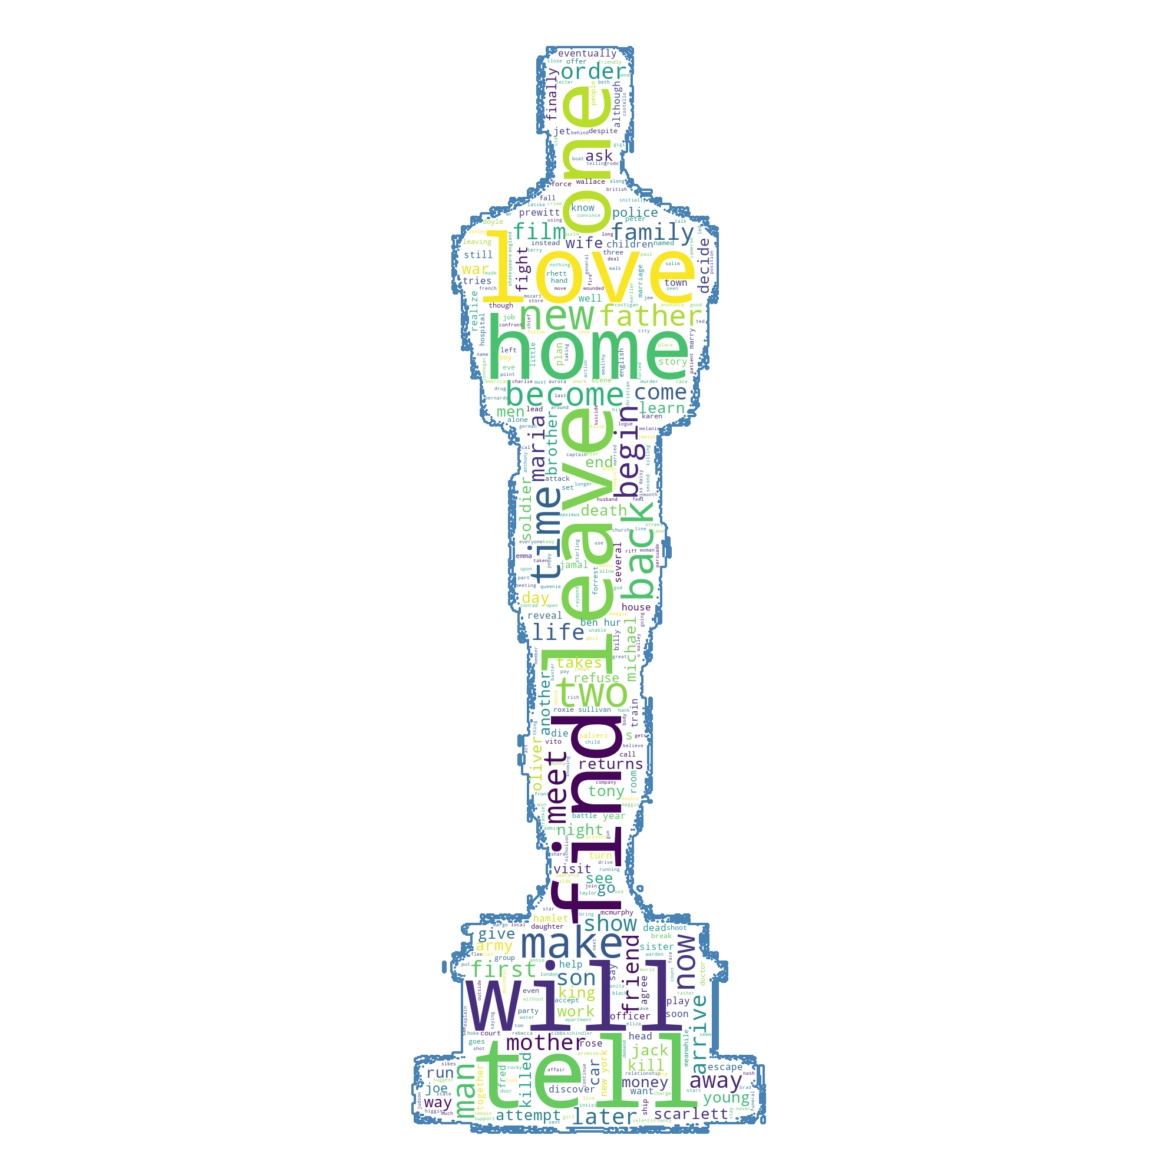

In [49]:
from wordcloud import WordCloud, STOPWORDS
import plotly.subplots as sp
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from os import path
import os
import matplotlib.pyplot as plt
from PIL import Image
plt.close("all")

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_path = path.join(d, "oscar.jpg")
oscar_mask = np.array(Image.open(mask_path).convert("L"))


def generate_wordcloud(data_column, stopwords):
    comment_words = ''
    for summary in data_column:
        tokens = summary.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    
    wc = WordCloud(background_color="white", max_words=2000, mask=oscar_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue', width=1600,  
                height=1600,  
                scale=2)
    wc.generate(comment_words)
    
  
    return wc


stopwords = set(STOPWORDS).union(set(['return', 'take']))
not_oscar_image = generate_wordcloud(not_oscar['Summary'], stopwords)
oscar_winning_image = generate_wordcloud(oscar_winning['Summary'], stopwords)


oscar_winning_image.to_file(path.join(d, "world_cloud_oscar.png"))
not_oscar_image.to_file(path.join(d, "world_cloud_not_oscar.png"))

img = Image.open("world_cloud_oscar.png")

img_array = np.array(img)



plt.figure(figsize=(15, 15)) 
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

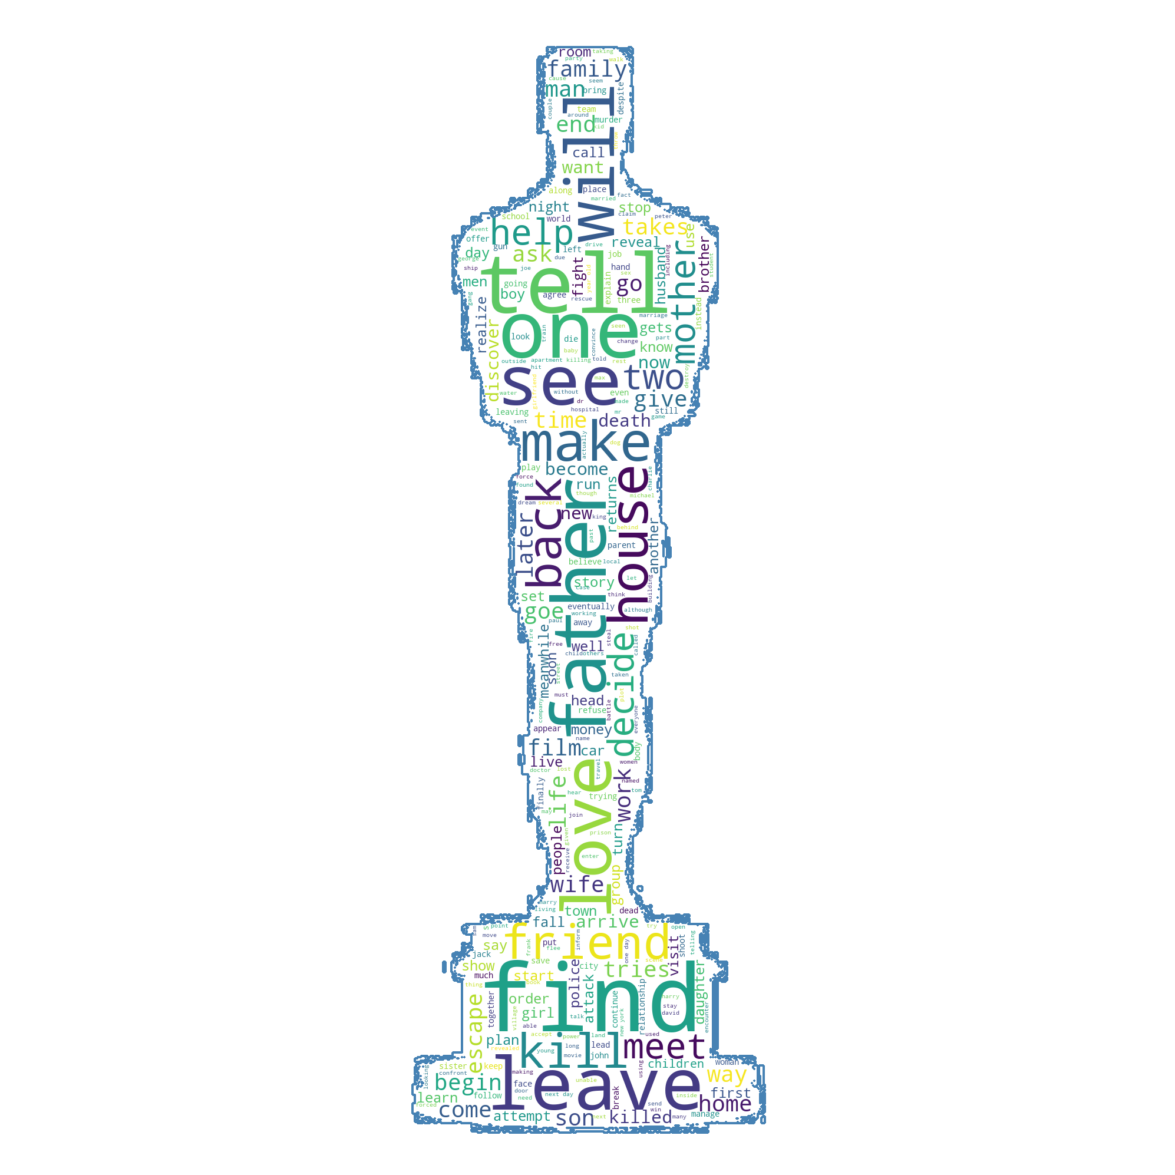

In [48]:
img = Image.open("world_cloud_not_oscar.png")

img_array = np.array(img)



plt.figure(figsize=(15, 15)) 
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
assert path.exists(path.join(d, "oscar.jpg")), "The file 'oscar.jpg' is missing!"
assert path.exists(path.join(d, "world_cloud_oscar.png")), "The file 'world_cloud_oscar.png' was not generated!"


In [26]:
from PIL import Image

try:
    img = Image.new("RGB", (100, 100), color="red")
    print("Pillow works correctly!")
except AttributeError as e:
    print(f"Error: {e}")

Pillow works correctly!


In [27]:
run_time_analysis = all_films.dropna(subset = 'merged date')
run_time_analysis['year'] = run_time_analysis['merged date'].apply(lambda s : s[: 4])
run_time_analysis[run_time_analysis['year'] == 'http'] = np.nan
run_time_analysis = run_time_analysis.dropna(subset = 'year')

run_time_analysis['year'] = run_time_analysis['year'].astype(int)

#remove outliers
run_time_analysis = run_time_analysis[run_time_analysis['runtime'] <= 1000]

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/743199060.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/743199060.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/743199060.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please e

In [28]:
mean_run_time_per_year_not_oscar = run_time_analysis[run_time_analysis['oscar'] == False].groupby(['year']).agg({'runtime' : 'mean'}).reset_index()
mean_run_time_oscar = run_time_analysis[run_time_analysis['oscar'] == True].groupby('year').agg({'runtime' : 'mean'}).reset_index()

In [29]:
min_year_oscar = mean_run_time_oscar['year'].min()
max_year_oscar = mean_run_time_oscar['year'].max()

mean_run_time_per_year_not_oscar =  mean_run_time_per_year_not_oscar[mean_run_time_per_year_not_oscar['year'] >= min_year_oscar]
mean_run_time_per_year_not_oscar =  mean_run_time_per_year_not_oscar[mean_run_time_per_year_not_oscar['year'] <= max_year_oscar]

In [30]:
mean_run_time_per_year_not_oscar = mean_run_time_per_year_not_oscar.rename(columns={'runtime' : 'mean run time without oscar'})
mean_run_time_oscar = mean_run_time_oscar.rename(columns={'runtime' : 'mean run time with oscar'})

In [31]:
mean_run_time = pd.merge(mean_run_time_oscar, mean_run_time_per_year_not_oscar, on='year', how='outer')

In [32]:

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mean_run_time['year'],
        y=mean_run_time['mean run time with oscar'],
        name="Mean Run Time with Oscar"
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_run_time['year'],
        y=mean_run_time['mean run time without oscar'],
        name="Mean Run Time without Oscar"
    )
)

fig.update_layout(
    title="Comparaison of the oscar mean movie run time with the movies that didn't won an oscar",
    xaxis_title="Year",
    yaxis_title="Mean Run Time",
    barmode="overlay", 
    legend_title="Categories"
)


fig.show()

In [33]:
title_length_analysis = all_films.dropna(subset='merged date')
title_length_analysis['title_length'] = title_length_analysis['film'].apply(lambda s : len(s))
title_length_analysis['year'] = title_length_analysis['merged date'].apply(lambda s : s[: 4])
title_length_analysis[title_length_analysis['year'] == 'http'] = np.nan
title_length_analysis = title_length_analysis.dropna(subset = 'year')

title_length_analysis['year'] = title_length_analysis['year'].astype(int)

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/2301263834.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/2301263834.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fv/f56ltf0x04g0yp86bf3wx6w80000gn/T/ipykernel_78641/2301263834.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [34]:
mean_title_length_per_year_not_oscar = title_length_analysis[title_length_analysis['oscar'] == False].groupby(['year']).agg({'title_length' : 'mean'}).reset_index()
mean_title_length_oscar = title_length_analysis[title_length_analysis['oscar'] == True].groupby('year').agg({'title_length' : 'mean'}).reset_index()

mean_title_length_per_year_not_oscar = mean_title_length_per_year_not_oscar.rename(columns={'title_length' : 'title length without oscar'})
mean_title_length_oscar  = mean_title_length_oscar.rename(columns={'title_length' : 'mean title length with oscar'})


min_year_oscar = mean_title_length_oscar['year'].min()
max_year_oscar = mean_run_time_per_year_not_oscar['year'].max()

mean_title_length_per_year_not_oscar=  mean_title_length_per_year_not_oscar[mean_title_length_per_year_not_oscar['year'] >= min_year_oscar]
mean_title_length_per_year_not_oscar=  mean_title_length_per_year_not_oscar[mean_title_length_per_year_not_oscar['year'] <= max_year_oscar]

In [35]:
mean_title_length = pd.merge(mean_title_length_oscar , mean_title_length_per_year_not_oscar, on='year', how='outer')

In [36]:

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mean_title_length['year'],
        y=mean_title_length['mean title length with oscar'],
        name="Mean Title Length with Oscar"
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_title_length['year'],
        y=mean_title_length['title length without oscar'],
        name="Mean Title Length without Oscar"
    )
)

fig.update_layout(
    title="Comparaison of the oscar mean movie title length time with the movies that didn't won an oscar",
    xaxis_title="Year",
    yaxis_title="Mean Run Time",
    barmode="overlay", 
    legend_title="Categories"
)


fig.show()

In [50]:
summary

,page_id,Freebase movie ID,film,Movie release date,box_office,runtime,languages,countries,genres,wikidata_id,...,capitalCost,release date,oscar,merged date,Wikipedia movie ID,Summary,sentiment_compound,sentiment_negative,sentiment_neutral,sentiment_positive
0,975900.0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"{ Action, Adventure, Horror, Science Fictio...",NaN,...,NaN,NaN,False,2001-08-24,975900,"Set in the second half of the 22nd century, th...",-0.9913,0.154,0.779,0.067
1,9363483.0,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"{ Erotic thriller, Thriller, Psychological th...",NaN,...,NaN,NaN,False,1987,9363483,A series of murders of rich young women throug...,-0.9977,0.189,0.722,0.089
2,261236.0,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,{Drama},NaN,...,NaN,NaN,False,1983,261236,"Eva, an upper class housewife, becomes frustra...",0.9524,0.069,0.831,0.101
3,18998739.0,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,English Language,South Africa,"{Family Film, World cinema, Adventure, Fant...",NaN,...,NaN,NaN,False,2002,18998739,"Every hundred years, the evil Morgana returns...",-0.8020,0.119,0.785,0.096
4,6631279.0,/m/0gffwj,Little city,1997-04-04,NaN,93.0,English Language,United States of America,"{ Comedy, Romantic comedy, Comedy-drama, Dra...",NaN,...,NaN,NaN,False,1997-04-04,6631279,"Adam, a San Francisco-based artist who works a...",-0.7097,0.111,0.798,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34445,31801851.0,NaN,Happi,NaN,NaN,NaN,Hindi,India,{},Q5652236,...,NaN,2019,False,2019-01-01T00:00:00Z,31801851,Happi is an homage to Charlie Chaplin by direc...,0.2500,0.000,0.900,0.100
34446,17576975.0,NaN,It's My Life,NaN,NaN,NaN,NaN,India,{},Q104841157,...,NaN,2020,False,2020-01-01T00:00:00Z,17576975,Rohit has an over-protective businessman fathe...,0.9505,0.021,0.784,0.195
34447,32386989.0,NaN,Paranormal Activity 2: Tokyo Night,NaN,NaN,90.0,Japanese,Japan,"{found footage, horror}",Q1335279,...,NaN,2010,False,2010-01-01T00:00:00Z,32386989,"In 2010, during Japanese international student...",-0.9984,0.154,0.803,0.043
34448,1047827.0,NaN,Game of Death,NaN,NaN,92.0,"English, Cantonese","Hong Kong, United States of America","{drama, cantopop, action}",Q854576,...,850000.0,1978,False,1978-01-01T00:00:00Z,1047827,ProductionCast Theme song Receptionhttp://www....,-0.3818,0.137,0.737,0.125
